In [22]:
from NeuralNetwork import NN, MLP, TinyCNN
from SGD import stochastic_gradient_descent, rss, mse
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import random
import copy
import matplotlib.pyplot as plt

In [23]:
seed = 12345
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [24]:
#Exogenous Variables
η, b = 0.0005, 32

μ, σ = 0, 1
n, d_input, d_output = 20000, 1, 1
X = torch.normal(mean=μ, std=σ, size=(n, d_input))
Y = torch.normal(mean=μ, std=σ, size=(n, d_output))

#plt.figure()
#plt.scatter(X, Y, alpha=0.7)
#plt.xlabel("X")
#plt.ylabel("Y")

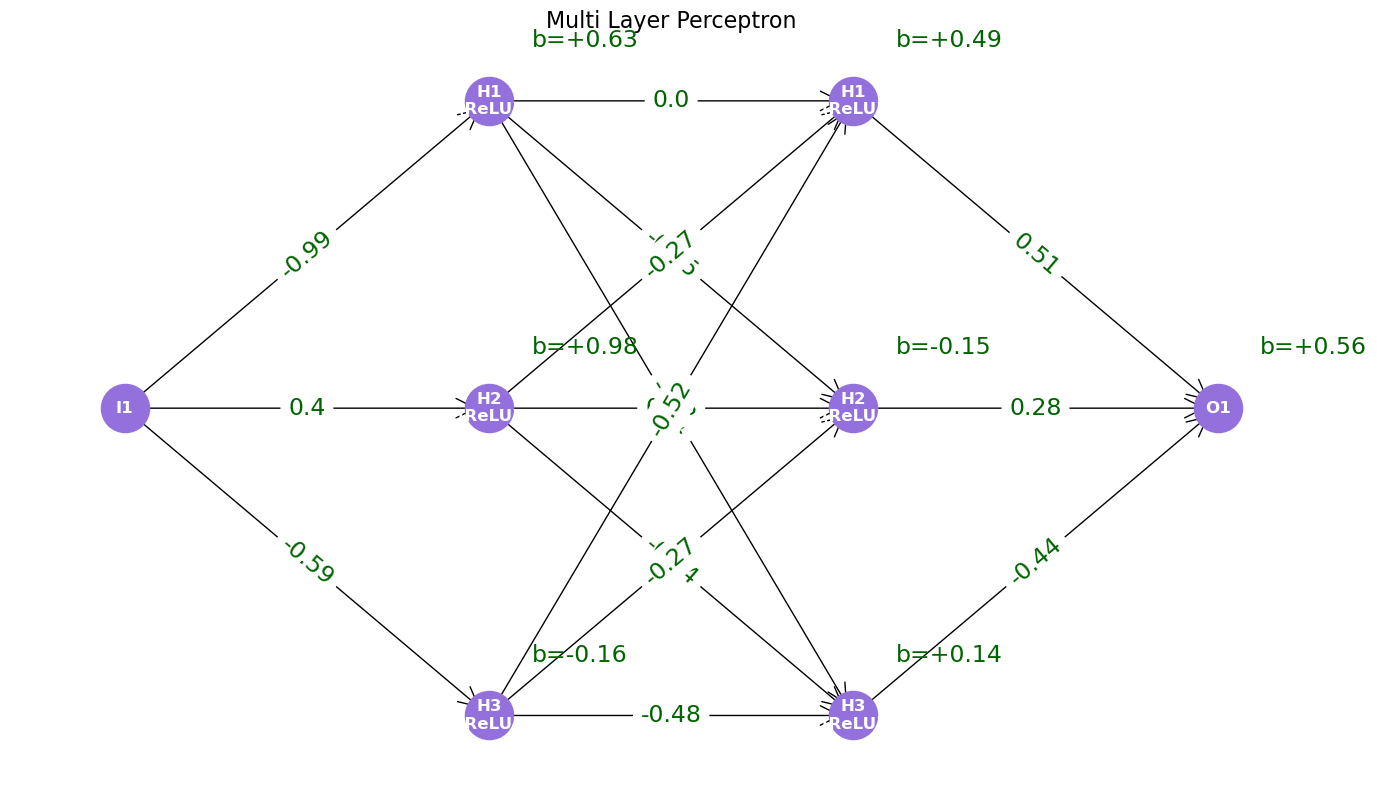

In [25]:
#Model and  start configuration
model = MLP(sizes=(1,3,3,1), activation=nn.ReLU, add_softmax=False)
model.visualize(title="Multi Layer Perceptron")
Y_hat = model(X)

θ0 = model.get_θ()
#print(θ0)

training_dataset = list(zip(X,Y))
#print(training_dataset)

In [26]:
#Forecast error for given Dataset X,Y
def loss_function(model, θ, X, Y, loss):
    model_copy = copy.deepcopy(model)
    model_copy.replace_θ(θ)
    Y_hat = model_copy(X)
    return float(loss(Y_hat, Y).detach())

In [27]:
#
def forward_with_θ(model, X, θ):
    idx = 0
    out = X
    for module in model.net:
        if isinstance(module, nn.Linear):
            W = θ[idx]
            bias = θ[idx + 1]
            out = out @ W.T + bias
            idx += 2
        else:
            out = module(out)
    return out

def loss_function_grad(model, θ, X, Y, loss_fn):
    θ_diff = [w.detach().clone().requires_grad_(True) for w in θ]

    Y_hat = forward_with_θ(model, X, θ_diff)
    #model.replace_θ(θ_diff)
    #Y_hat = model(X)
    loss_val = loss_fn(Y_hat, Y)
    loss_val.backward()

    grads = [w.grad for w in θ_diff]
    return grads

In [28]:
def rss(Y_hat, Y):
    return ((Y_hat - Y) ** 2).sum()
def mse(Y_hat, Y):
    diff = Y_hat - Y
    return torch.mean(diff * diff)

In [29]:
error_before = float((rss(Y_hat, Y)).detach())
print(error_before)
#print("training dataset:")
#print(training_dataset)

28668.0234375


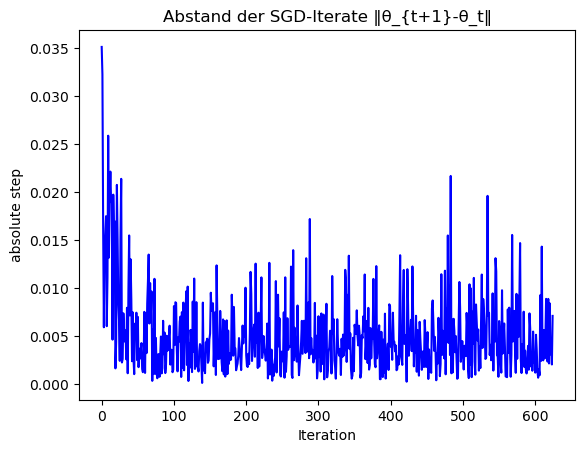

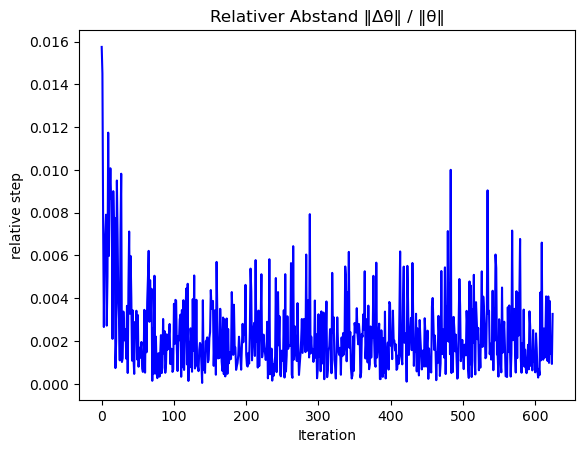

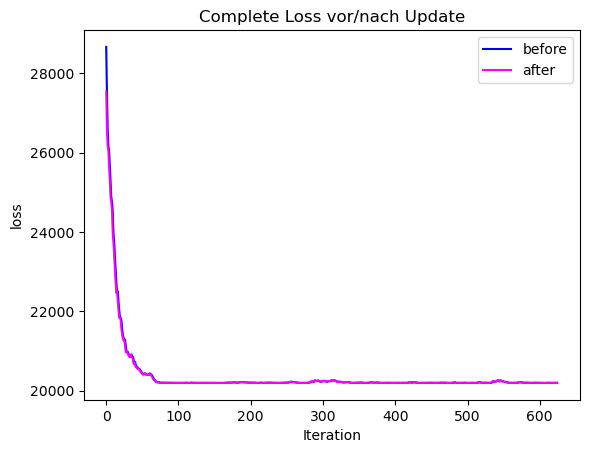

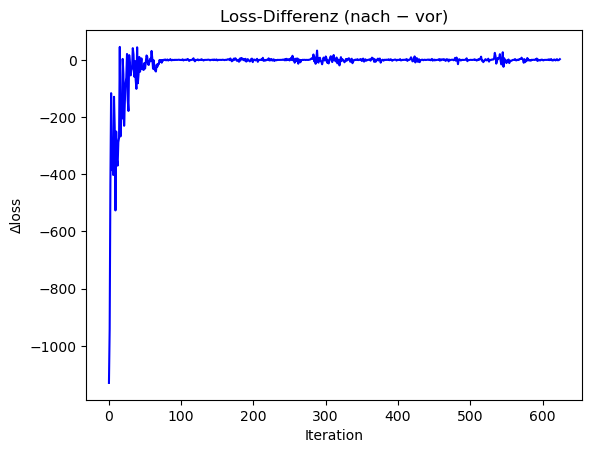

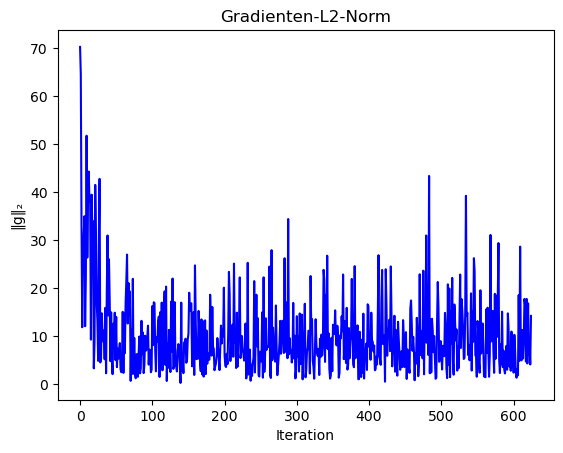

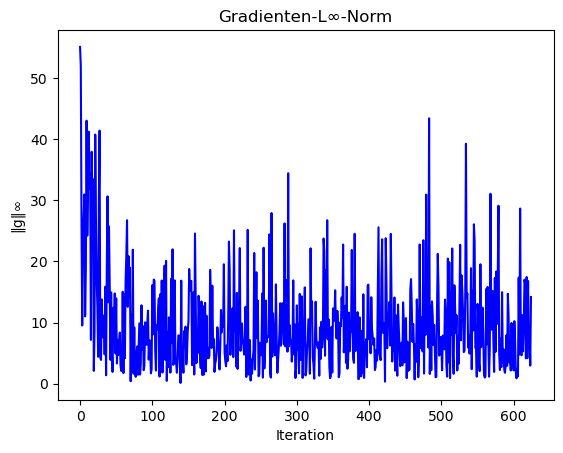

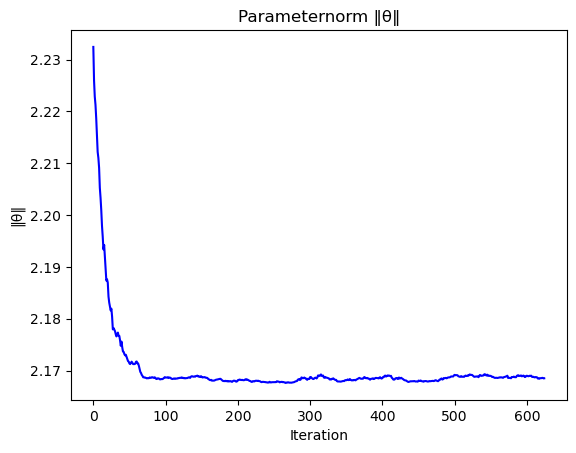

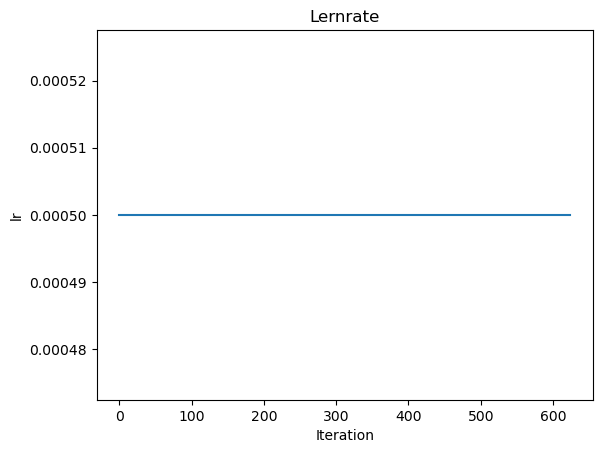

Final Loss(θ0):28668.0234375
Final Loss(θ*):20196.93359375
Absolute Final Error Reduction:-8471.08984375
Relative Final Error Reduction:-29.548914881481352%


In [30]:
θ1 = stochastic_gradient_descent(model, θ0, training_dataset, rss, η, b, plot=True)


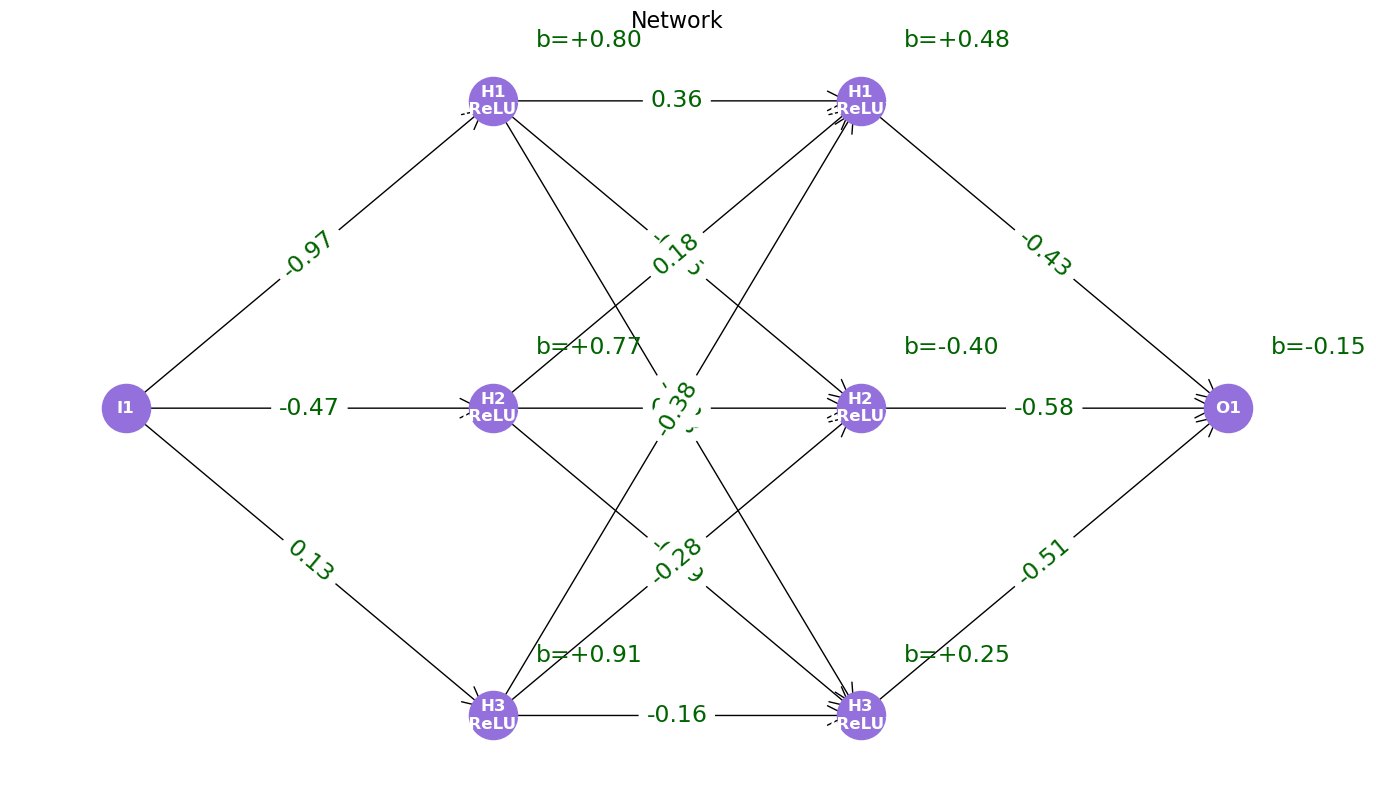

In [73]:
model.visualize()

In [74]:
Y_hat = model(X)

#error_after = float((rss(Y_hat, Y)).detach())
error_after = float(loss_function(model, θ1, X, Y, rss))
#print(error_after)
print("Fehlerdifferenz: " + str(((error_after - error_before) / error_before) * 100) + "%")

Fehlerdifferenz: -19.694415351581497%
